About the data sets: http://opendata.cern.ch/record/545

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method

import scipy.special as sf
%matplotlib notebook


## Get the Data
# $$ m_{inv} = \sqrt{2p_{t,1}p_{t,2}\cosh(\eta_1 - \eta_2) - \cos(\phi_1 -\phi_2)}$$

In [10]:
d3 = pd.read_csv('Data/Zmumu_Run2011A.csv')
minv_mu = np.sqrt(2*d3.pt1*d3.pt2 * (np.cosh(d3.eta1 - d3.eta2) - np.cos(d3.phi1 - d3.phi2) ))
d3['M'] = minv_mu
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
 14  M       10583 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.2 MB


<IPython.core.display.Javascript object>


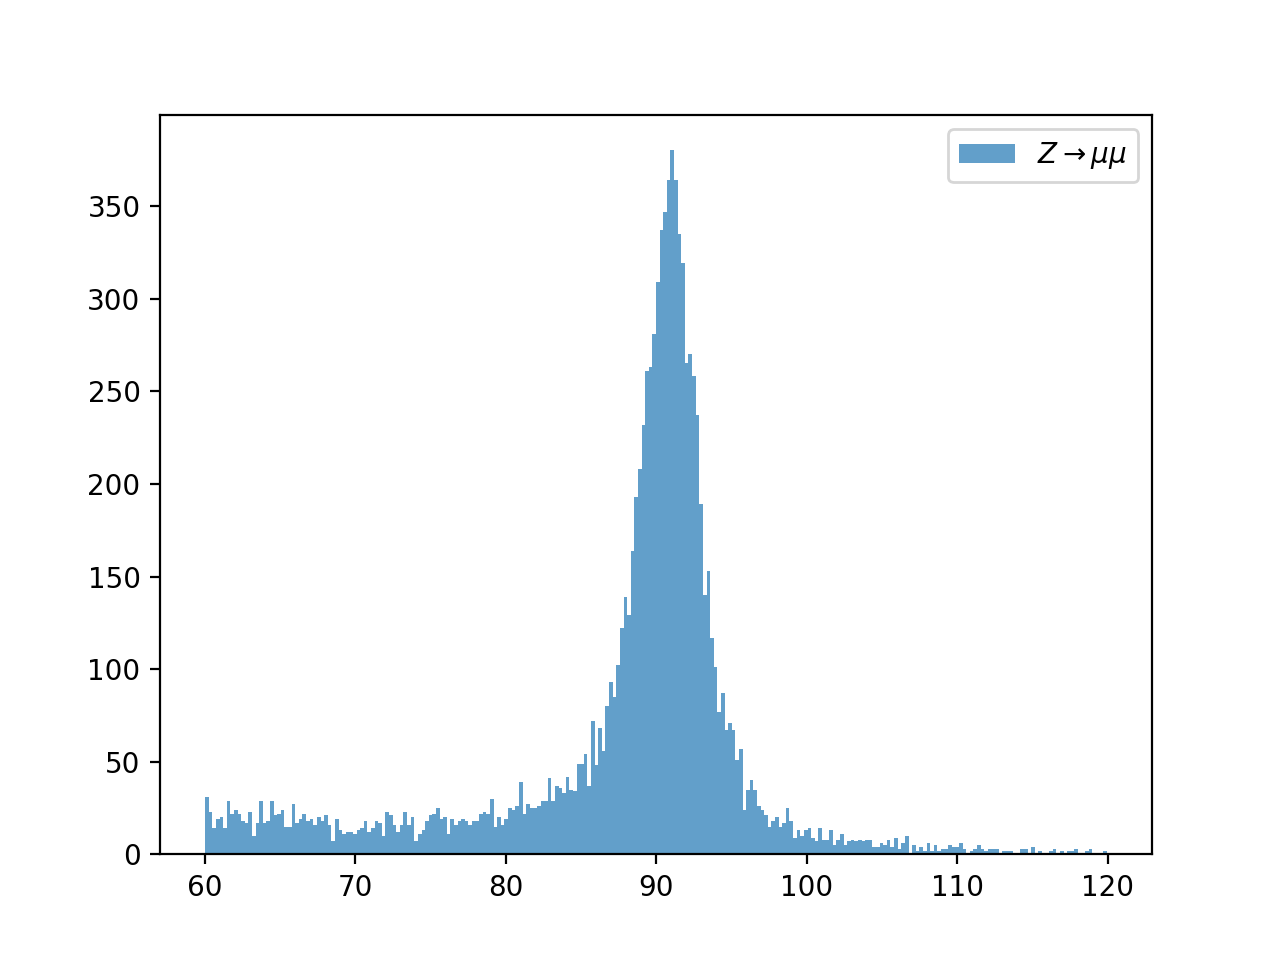

In [11]:
fig = plt.figure('Z decay')
plt.hist(minv_mu,bins=250,alpha = 0.7, label=r'$Z\rightarrow \mu\mu$')
plt.legend();

# Fit the Data
## Relativistic Breit–Wigner Distribution
Wikepedia: https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

# $f(E) = \frac{k}{(E^2 -M^2)^2 + M^2\Gamma^2}$ 

where

# * $\gamma$ = $\sqrt{M^2(M^2+\Gamma^2)}$
# * $k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}$

In [12]:
def breitwigner_rel(E, gamma, M, a, b, A):
    
    little_gamma = np.sqrt( M**2*(M**2 + gamma**2) )
    
    k = 2*np.sqrt(2)*M*gamma*little_gamma/( np.pi*np.sqrt(M**2 + little_gamma) )
    
    return a*E + b + A* (k/ ( (E**2 - M**2)**2 + M**2 * gamma**2) )
    

In [ ]:
# Let's limit the fit near to the peak of the histogram.
lowerlimit = 70
upperlimit = 110 
bins = 150

fig = plt.figure()
histogram_mu = plt.hist(minv_mu, bins=bins, range = (lowerlimit,upperlimit))
#print(histogram_mu)
## Need to go over this with class

#print(histogram_mu[0][:]) #bins counts
#print(histogram_mu[1][:]) #mass values

y_mu = histogram_mu[0]
x_mu = 0.5*(histogram_mu[1][0:-1] + histogram_mu[1][1:])
y_mu_error = np.sqrt(y_mu)
for i in range (len(y_mu)):
    if y_mu_error[i] == 0:
        y_mu_error[i] = 1.0
    else:
        y_mu_error[i] = y_mu_error[i]

initals = [2.5, 91, -2, 200, 13000]
best_mu, covariance_mu = curve_fit(breitwigner_rel, x_mu, y_mu, p0=initals, sigma=y_mu_error)

plt.plot(x_mu, breitwigner_rel(x_mu, *best_mu),'r-',label='M = {}'.format(best_mu[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend();

chisq = np.sum( (y_mu - breitwigner_rel(x_mu, *best_mu))**2/y_mu_error**2 )
dof = len(y_mu) - len(best_mu)
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('reduced chi2: ', chisq/dof)
print('p-value: ',pvalue)

# Comparing distributions

In [20]:

d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
 14  M       10583 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.2 MB


<IPython.core.display.Javascript object>


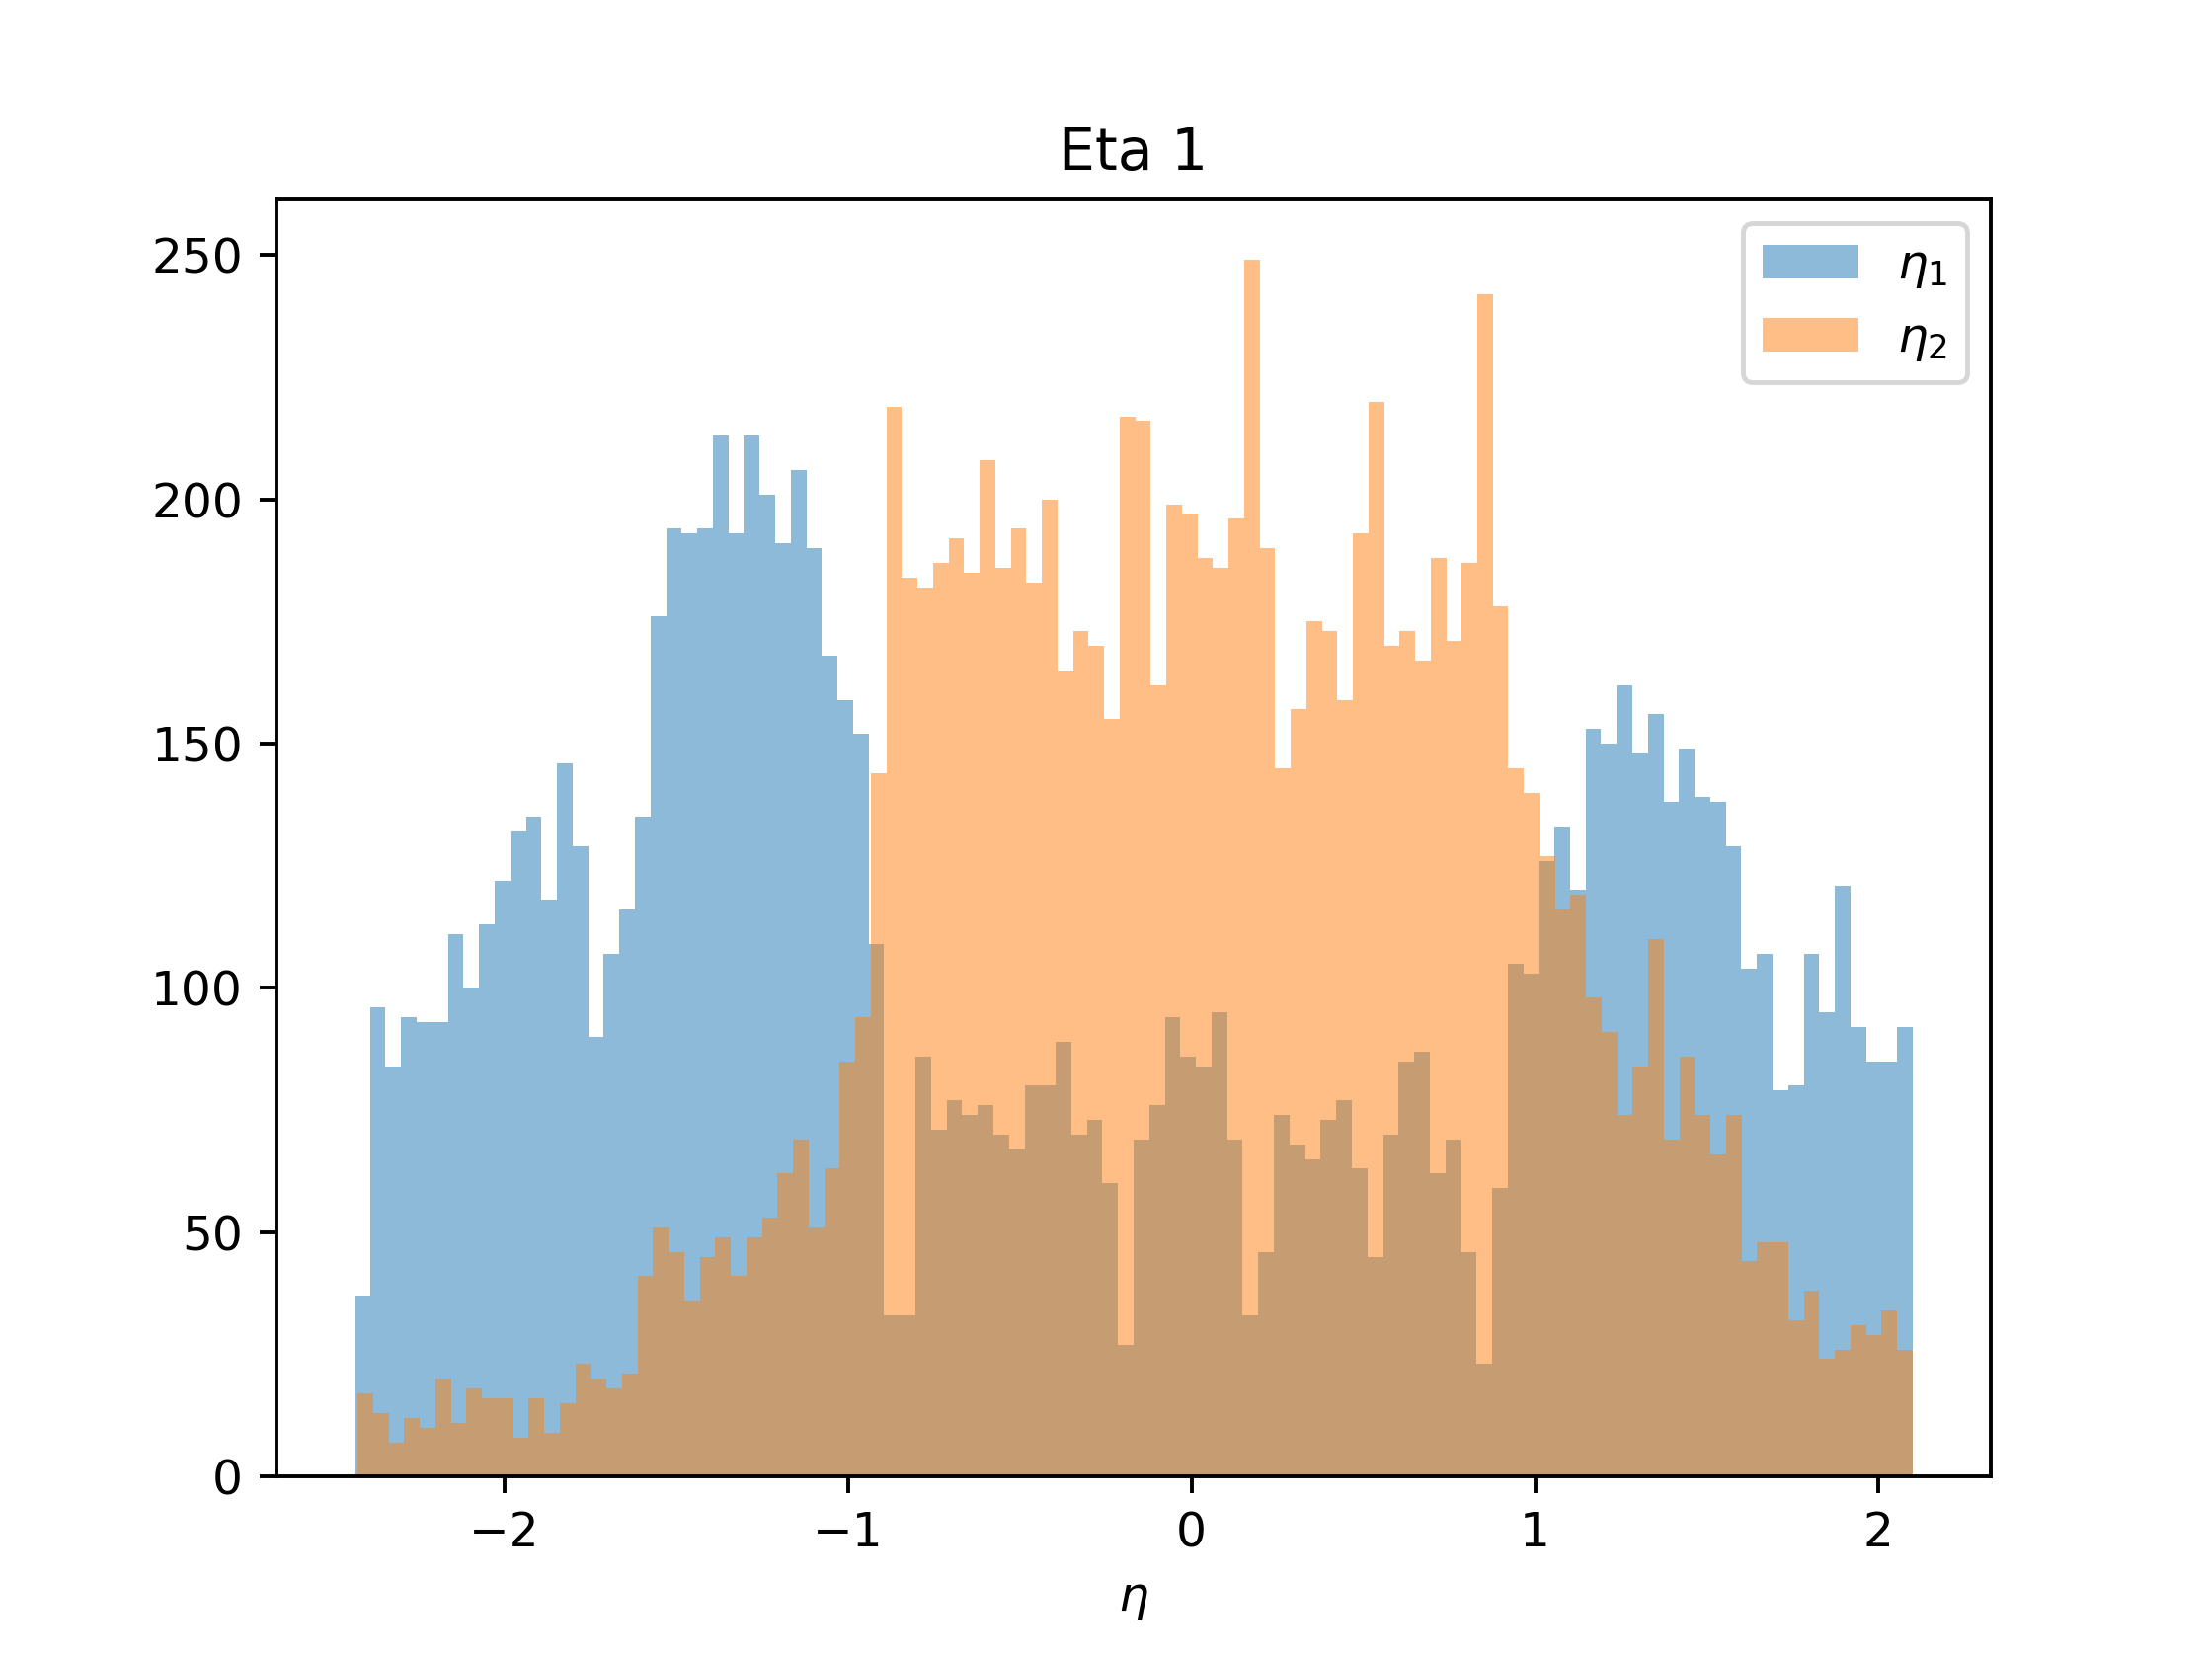

In [22]:
fig = plt.figure('eta')
plt.hist(d3.eta1,bins=100,alpha= 0.5,label=r'$\eta_1$')
plt.hist(d3.eta2,bins=100,alpha = 0.5,label=r'$\eta_2$')

plt.xlabel(r'$\eta$')
plt.title('Eta 1')
plt.legend();